# **CIBA - PYTHON AVANZADO**

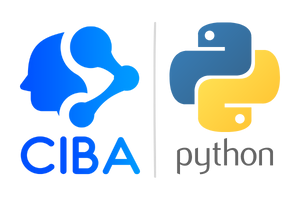


Contenido:
* Series Temporales
* Importación de Librerías
* Importación de la Data  
* Limpieza de Datos
* Análisis Gráfico
* Descomposición de la serie
* Modelamiento
* Predicción
* Conclusiones




# SERIES TEMPORALES
El análisis de series de tiempo es una **técnica estadística utilizada para analizar y modelar datos que varían a lo largo del tiempo.** Estos datos pueden ser de cualquier tipo, como ventas, ingresos, producción, clima, entre otros. 

* **El objetivo principal:** es entender la estructura subyacente de los datos y predecir su comportamiento futuro.

* **Componentes principales:** 
  * La tendencia: es la dirección general en la que se mueven los datos a largo plazo. 
  * La estacionalidad: es la variación en los datos debido a patrones repetitivos que se producen en intervalos regulares. 
  * El ruido son las fluctuaciones aleatorias de los datos que no se pueden explicar por la tendencia o la estacionalidad.

*************************************************
# PROBLEMA: Modelo para predecir ventas futuras
*************************************************

Se Trabajará con un conjunto de datos de series temporales que consiste en datos de ventas diarias.

* Objetivo:
Predecir las ventas totales en el próximo mes (Considerar tiempos diarios).

* Variable objetivo o Target: sales (Ventas)

* Variables adicionales:
  * store: nro de tienda
  * item: tipo de producto

* Base de datos: SalesDemand.csv


# IMPORTACIÓN DE LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# IMPORTACIÓN DE DATOS

In [ ]:
#Conexión a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/CLUBS DE APRENDIZAJE/CLUB PYTHON/PYTHON AVANZADO/Materiales Avanzado/SalesDemand.csv', encoding= 'latin-1', sep=';')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# LIMPIEZA DE DATOS

#### PASO 0: ADECUAR LAS FECHAS Y LOS VALORES A LOS CORRECTOS DE NUESTRA INFORMACIÓN. ####

In [ ]:
data.head(5)

,date,store,item,sales
0,1/01/2013,1.0,1.0,13.0
1,2/01/2013,1.0,1.0,11.0
2,3/01/2013,1.0,1.0,14.0
3,4/01/2013,1.0,1.0,13.0
4,5/01/2013,1.0,1.0,10.0


In [ ]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [ ]:
data.shape

(958000, 4)

1) Realizamos primero, un análisis exploratorio sobre nuestra data. Así mismo observamos que posee 958 000 valores y 4 columnas, siendo nuestra variable objetivo las ventas representadas por el nombre 'sales'.

In [ ]:
data.dtypes

date      object
store    float64
item     float64
sales    float64
dtype: object

2) Lo que procederemos a realizar es volver nuestra data en un formato de fecha.

Vemos que ya tenemos nuestras fechas con el formato adecuado, así que se procede a cambiarlas a un formato de fechas, meses y años.

In [ ]:
data['date'] = pd.to_datetime(data['date'],format = '%d/%m/%Y')

In [ ]:
data.dtypes

date     datetime64[ns]
store           float64
item            float64
sales           float64
dtype: object

Viendo el formato de nuestra data, vemos que las fechas no están en el formato date, por lo que reasignamos su formato.

#### PASO 1: AGRUPAR Y DAR FORMA A NUESTROS DATOS ####

In [ ]:
df=data.groupby('date')['sales'].sum().rename('ventas_totales')

In [ ]:
df.head(5)

date
2013-01-01    13696.0
2013-01-02    13678.0
2013-01-03    14488.0
2013-01-04    15677.0
2013-01-05    16237.0
Name: ventas_totales, dtype: float64

In [ ]:
df=pd.DataFrame(df)
df.dtypes,df.shape

(ventas_totales    float64
 dtype: object, (1826, 1))

In [ ]:
#Con el siguiente comando podemos sub-dividir las fechas en sus sub-componentes.
df['Month']=df.index.map(lambda d:d.strftime('%m'))
df['Years']=df.index.map(lambda d:d.strftime ('%Y'))

In [ ]:
df.head(5)

,ventas_totales,Month,Years
date,,,
2013-01-01,13696.0,01,2013
2013-01-02,13678.0,01,2013
2013-01-03,14488.0,01,2013
2013-01-04,15677.0,01,2013
2013-01-05,16237.0,01,2013


Estamos ahora interesados en descomponer la serie y evaluarla para posteriormente realizar las transformaciones necesarias y poder volverla estacionaria.

#### PASO 2: DESCOMPOSICIÓN DE NUESTRA SERIE Y TRATAMIENTO DE LOS DATOS. ####

<AxesSubplot:xlabel='Month', ylabel='ventas_totales'>

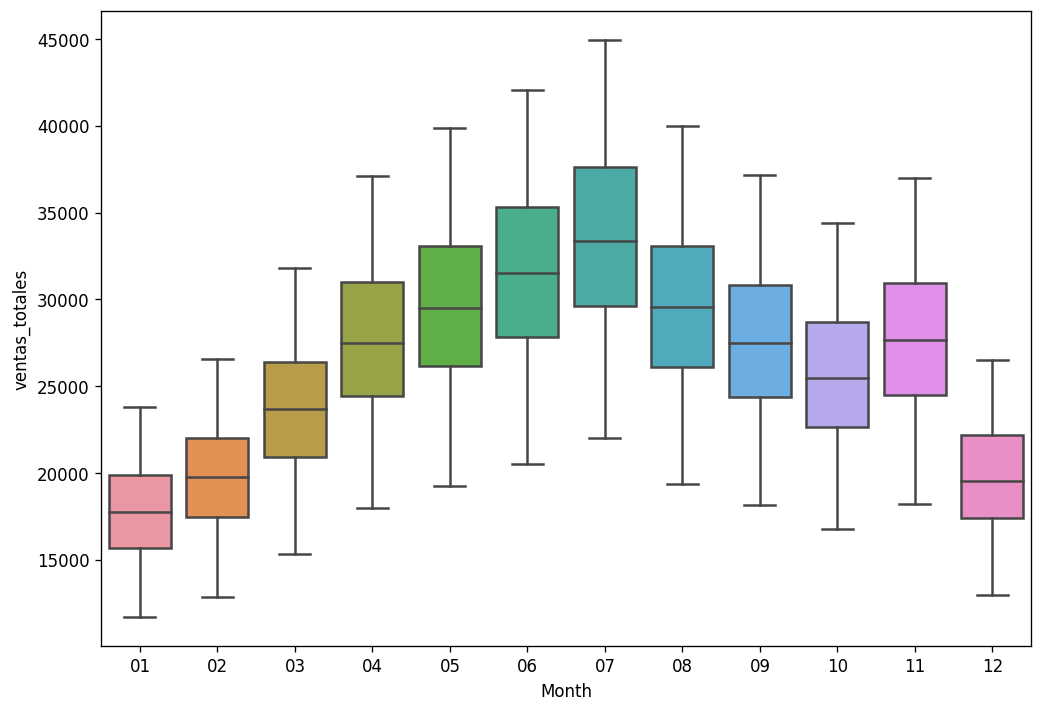

In [ ]:
sns.boxplot(x='Month', y='ventas_totales', data=df)

* Comentario: Realizando una inspección visual de nuestra información vemos que no presenta algún valor atípico realmente, observando el hecho que se observa un aumento a mediados de año, en este caso se encontraría en los meses 6 y 7, sin embargo para el mes 11 hay una sobre reacción, la cual rompe esta forma de campana.

* Debido a la gran cantidad de valores, consideramos pertinente trabajar con data mensual para posteriormente realizar nuestro análisis de outlier mediante el SVM.

In [ ]:
df['fechas'] = df.Years.astype(str) + str('-') + df.Month.astype(str) + str('-1')
df.fechas=pd.to_datetime(df.fechas)
df.head(5)

,ventas_totales,Month,Years,fechas
date,,,,
2013-01-01,13696.0,01,2013,2013-01-01
2013-01-02,13678.0,01,2013,2013-01-01
2013-01-03,14488.0,01,2013,2013-01-01
2013-01-04,15677.0,01,2013,2013-01-01
2013-01-05,16237.0,01,2013,2013-01-01


In [ ]:
df = df.groupby('fechas')['ventas_totales'].sum().rename('ventas_totales')
df = pd.DataFrame(df)
df.head(5)

,ventas_totales
fechas,
2013-01-01,454904.0
2013-02-01,459417.0
2013-03-01,617382.0
2013-04-01,682274.0
2013-05-01,763242.0


# ANÁLISIS GRÁFICO

El gráfico de la serie permitirá detectar los siguientes elementos:

a) Outliers:
- Se refiere a puntos de la serie que se escapan de lo normal.
- Si se sospecha que una observación es un outliers, se debe reunir
información adicional sobre posibles factores que afectaron el proceso.

b) Tendencias:
- La tendencia representa el comportamiento predominante de la serie.
- Esta puede ser definida como el cambio de la media a lo largo de un extenso
período de tiempo.

c) Variaciones cíclicas o estacionales:
- La variación estacional representa un movimiento periódico de la serie de
tiempo.
- La duración del período puede ser un año, un trimestre, un mes, un día,
etc.

d) Variaciones aleatorias.
- Los movimientos irregulares (al azar) representan todos los tipos de
movimientos de una serie de tiempo que no sea tendencia, variaciones
estacionales y fluctuaciones cíclicas.

Text(0.5, 1.0, 'Serie temporal de ventas')

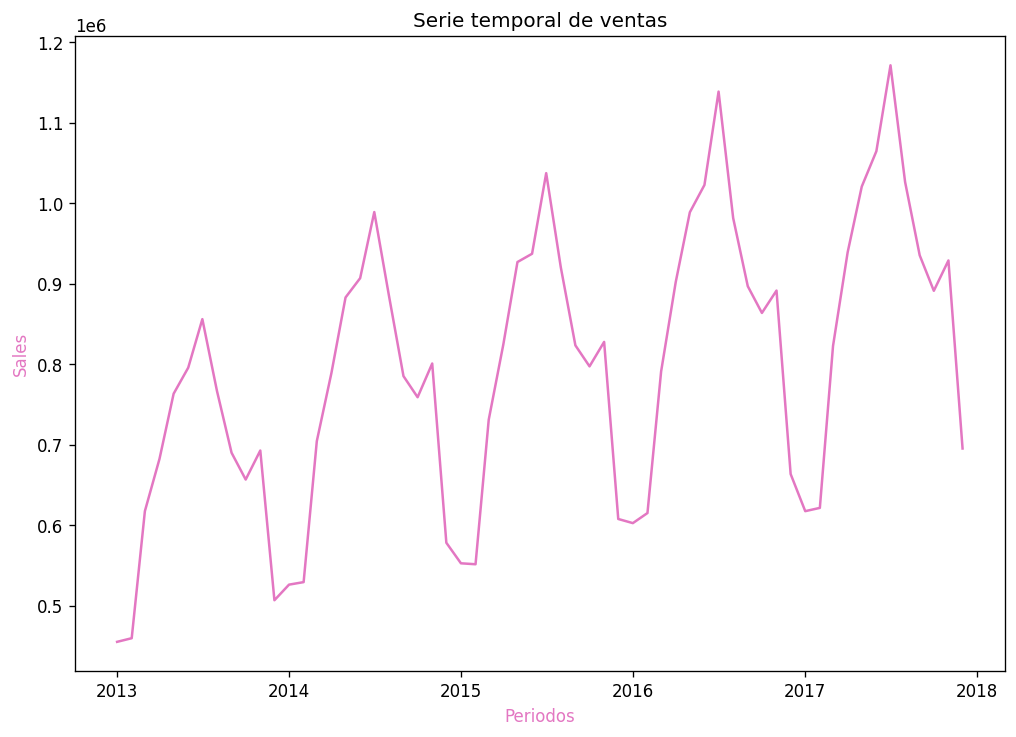

In [ ]:
plt.plot(df.ventas_totales, color = 'tab:pink')
plt.xlabel('Periodos', color ='tab:pink')
plt.ylabel('Sales', color='tab:pink')
plt.title('Serie temporal de ventas')

* Comentario: Como vemos tenemos una gráfica mucho más suavizada y con clara alusión a un modelo del tipo multiplicativo debido al aumento en la volatidad a través de los años, sin embargo es necesario conocer la cantidad de outliers que podríamos encontrar.

#### DETECCIÓN DE OUTLIERS ####

In [ ]:
from sklearn import preprocessing,svm

In [ ]:
scaler = preprocessing.StandardScaler()

In [ ]:
#Es necesario re-dimensionar nuestra información en una columna.
ts_scaler = scaler.fit_transform(df.ventas_totales.values.reshape(-1,1))

In [ ]:
#Se utiliza el algoritmo One-class SVM (Support Vector Machine) para detectar valores atípicos
model = svm.OneClassSVM(nu= 0.05,kernel ='rbf',gamma=0.02)
model.fit(ts_scaler)

OneClassSVM(gamma=0.02, nu=0.05)

In [ ]:
df_outlier = df.ventas_totales.to_frame(name='ts') #creación del dataframe df_outlier
df_outlier['index']= range(len(df)) #agrega al df la columna index - indica el punto donde se encuentra el outlier
df_outlier['outlier']=model.predict(ts_scaler) #creación de la columna outlier - predicción de los valores outliers estandarizados
df_outlier['outlier']=df_outlier['outlier'].apply(lambda x:1 if x== -1 else 0)

In [ ]:
df_outlier.groupby('outlier').size()

outlier
0    57
1     3
dtype: int64

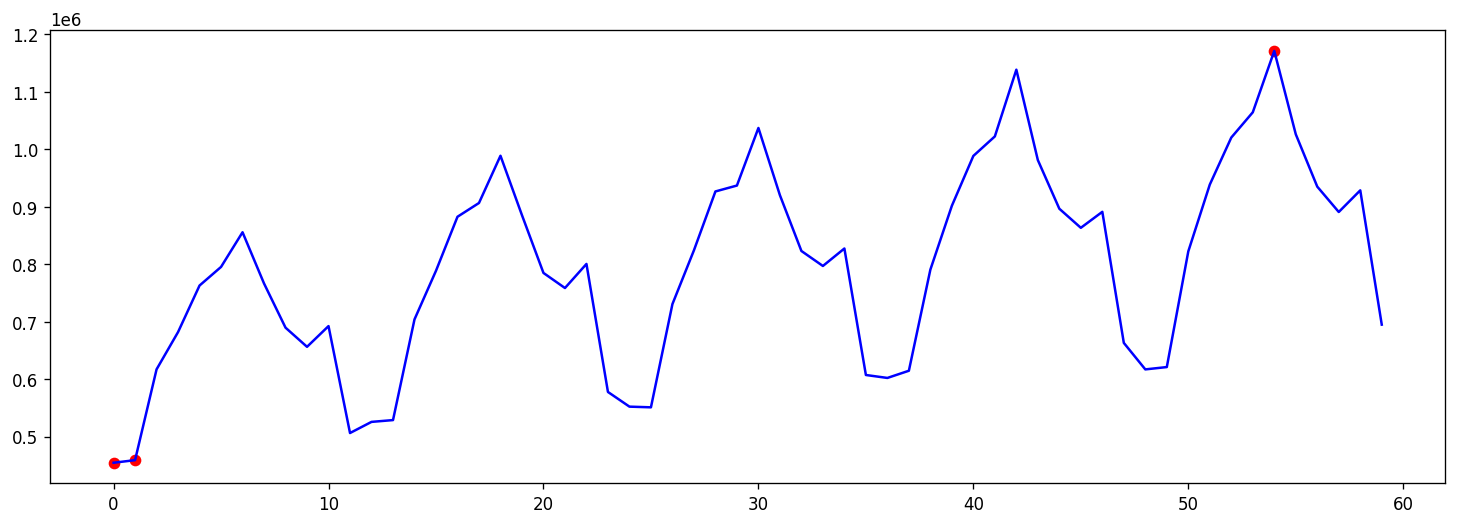

In [ ]:
#Graficamos los outliers detectados.
fig, ax= plt.subplots(figsize=(15,5))
ax.plot(df_outlier['index'],df_outlier['ts'],color='blue')
ax.scatter(x=df_outlier[df_outlier['outlier']==1]['index'],
           y=df_outlier[df_outlier['outlier']==1]['ts'],
          color='red')
plt.show()

In [ ]:
#Realizamos la imputación o limpieza de estos datos atípicos.
outlier_index = df_outlier[df_outlier['outlier']==1].index
ts_clean = df.ventas_totales.copy()
ts_clean.loc[outlier_index]= np.nan

In [ ]:
ts_clean.head(5)

fechas
2013-01-01         NaN
2013-02-01         NaN
2013-03-01    617382.0
2013-04-01    682274.0
2013-05-01    763242.0
Name: ventas_totales, dtype: float64

#### IMPUTACIÓN DE DATOS FALTANTES

In [ ]:
ts_clean=ts_clean.interpolate(method ='linear')
ts_clean.head(5)

fechas
2013-01-01         NaN
2013-02-01         NaN
2013-03-01    617382.0
2013-04-01    682274.0
2013-05-01    763242.0
Name: ventas_totales, dtype: float64

<AxesSubplot:xlabel='fechas'>

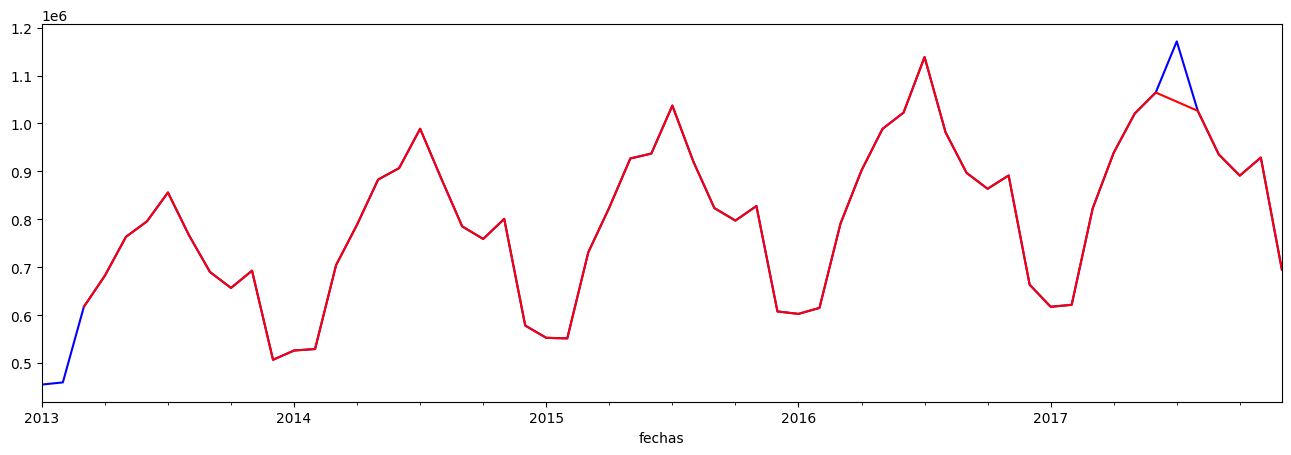

In [ ]:
plt.figure(figsize=(16,5),dpi=100)
df.ventas_totales.plot(color='blue')
ts_clean.plot(color='red')




* Comentario: Vemos entonces nuestra data mucho más limpia 
mediante el método de interpolación, sin embargo para nuestro análisis trabajaremos aún con la serie original, debido a que creemos que es necesario incluir esta clase de comportamiento para nuestro análisis, además de la poca cantidad de outliers que contiene.




# DESCOMPOSICIÓN DE LA SERIE ####

**La descomposición de la serie es útil** para entender la estructura subyacente de la serie, **identificar patrones y tendencias y para la selección de modelos de predicción adecuados.** Una vez que la serie ha sido descompuesta, se puede ajustar un modelo para cada componente **y luego se puede realizar la predicción combinando los resultados de cada modelo.**

La descomposición de series de tiempo, supone que la serie Y(1), ..., Y(n) puede ser expresada como suma o producto de sus componentes.

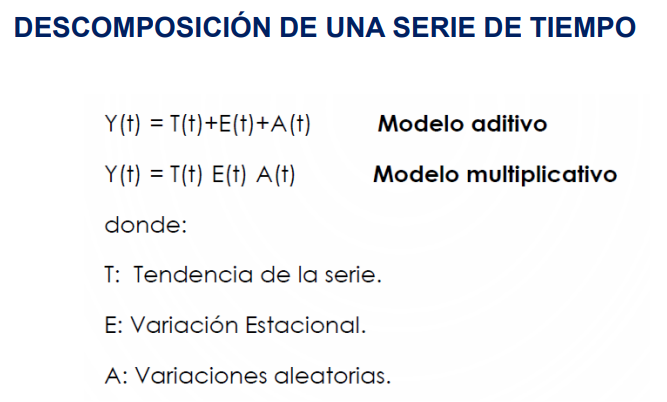

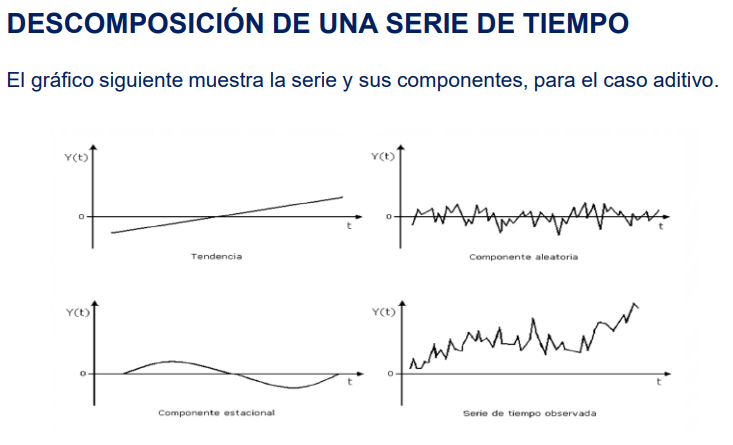

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose #La función se usa para descomponer una serie temporal en sus componentes
from dateutil.parser import parse #convertir cadena de texto a objeto

Habíamos observado previamente que nuestra data original se ajustaba mejor a un modelo multiplicativo dado que presentaba cierto aumento en su volatilidad en los últimos años.

Text(0.5, 0.98, 'Método Aditivo')

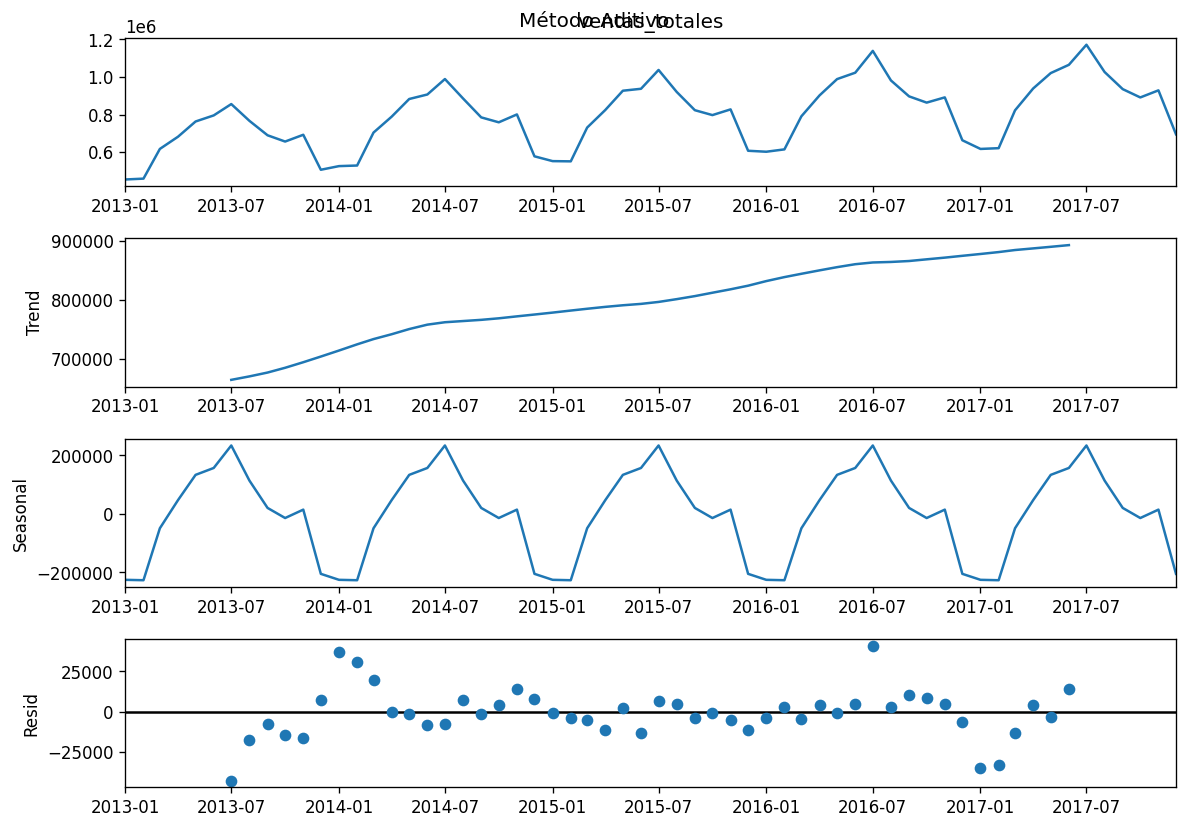

In [ ]:
mul_model= seasonal_decompose(df.ventas_totales, model= 'multiplicative')
add_model = seasonal_decompose(df.ventas_totales, model= 'additive')
add_model.plot().suptitle('Método Aditivo')

* Tal como observabamos, posee una tendencia creciente y un comportamiento bastante estacional, el siguiente paso es comprobar si es ESTACIONARIA O NO para aplicar las transformaciones necesarias.

#### PROCESO ESTACIONARIO ####

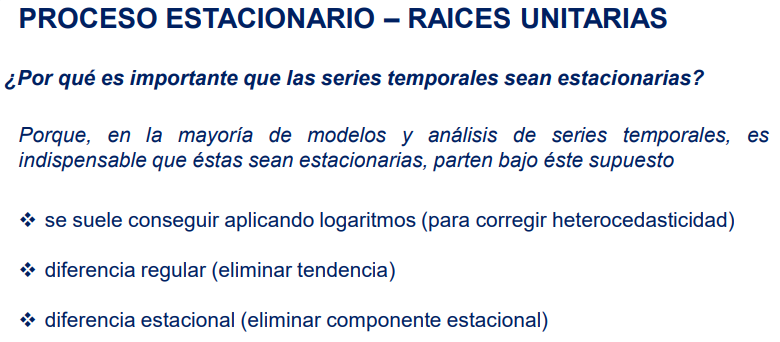

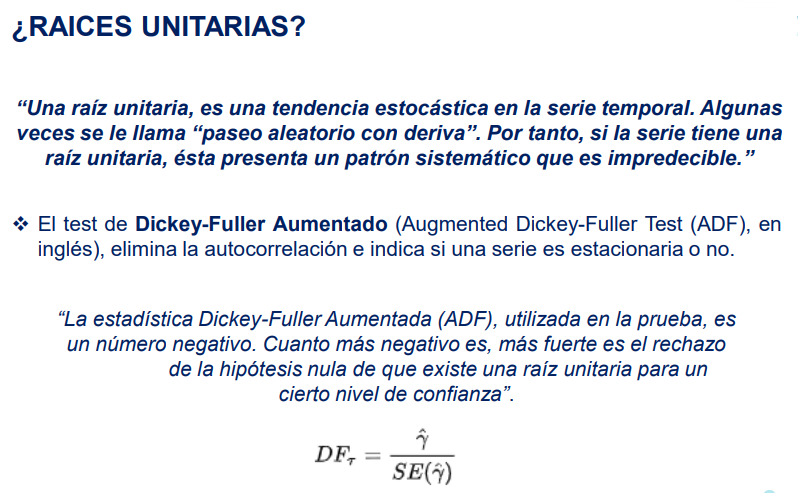

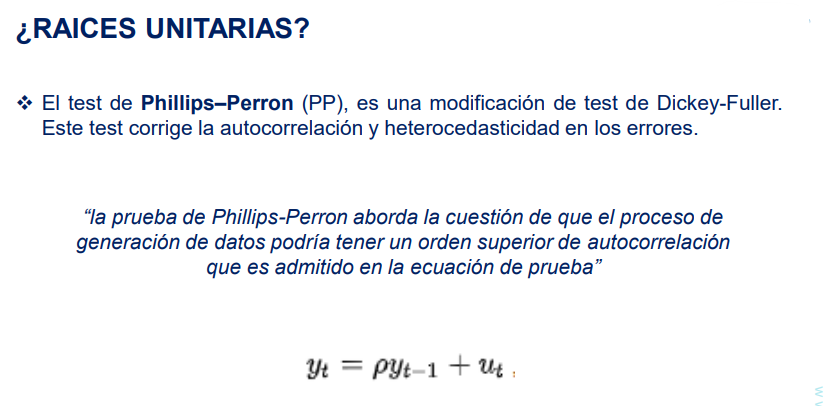

In [ ]:
#PRUEBA DE HIPOTESIS
# H0 : No es estacionaria.
# H1 : Es estacionaria.

# Para la prueba de Dickey-Fuller p<0.05 es estacionaria.
# Para la prueba de Phillips-Peron p>0.05 es estacionaria.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
dickey_fuller=adfuller(df.ventas_totales)
print('p-value',dickey_fuller[1])

p-value 7.026495391574818e-06


* Resultado: Vemos que utilizando solo la serie inicial arroja un valor de p-value bastante cercano a 0 siendo este menor al 0.05 por lo cual rechazamos nuestra hipótesis H0, de que no son estacionarias, es decir nuestra serie es Estacionaria.

# MODELAMIENTO

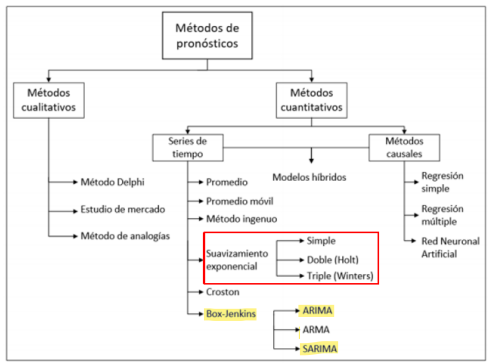

In [ ]:
import requests
import statsmodels.api as sm
import io
import os
import pylab 
import scipy.stats as stats
from scipy.stats import kstest 
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.model_selection import TimeSeriesSplit #función de validación cruzada / dividir en data train y test
from sklearn.metrics import mean_squared_error #MSE: error al cuadrado de la preddicción entre los reales
from statsmodels.tsa.stattools import acf, pacf #Análisis estadístico de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### ENFOQUE SUAVIZAMIENTO #####

Suavizado Exponencial Simple
* La suposición principal de este modelo es que la serie se mantiene en el mismo nivel (es decir, **la media local de la serie es constante**) a lo largo del tiempo y, por lo tanto, este modelo es adecuado **para series sin componentes de tendencia ni estacionales**.
* Además, la función SES es una función escalonada, dónde el valor pronosticado n del modelo se convierte en la entrada del próximo pronóstico de las siguientes n + 1 observaciones. Usamos la siguiente ecuación:


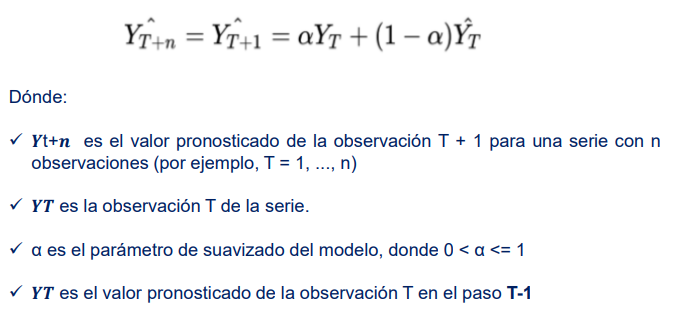

Suavizado Exponencial Doble (Holt)
* Se basa en la **estimación del nivel y la tendencia más recientes** con el uso de dos **parámetros de suavizado, α y β**.
* Una vez que el modelo estima el nivel y la tendencia más recientes (𝑳𝑻 y 𝑻𝑻, respectivamente), los utiliza para construir el pronóstico de la serie utilizando la siguiente ecuación:

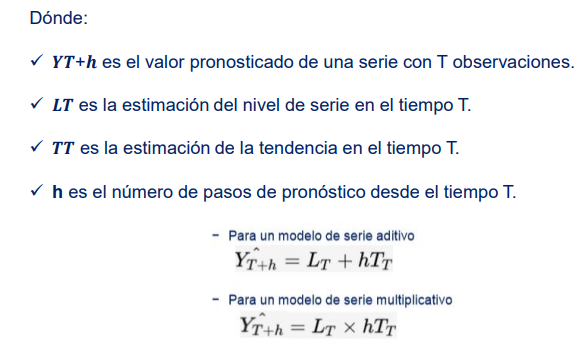

Suavizado Exponencial Holt - Winters
* El modelo Holt-Winters (HW) es una versión extendida del modelo Holt y puede manejar datos de series temporales con componentes de tendencia y estacionales.
* Pronosticar el componente estacional requiere un tercer parámetro y ecuación más suaves, además de los del nivel y la tendencia.
* Tanto la tendencia como los componentes estacionales podrían tener una estructura aditiva o de multiplicidad, lo que agrega cierta complejidad al modelo ya que existen múltiples combinaciones posibles:

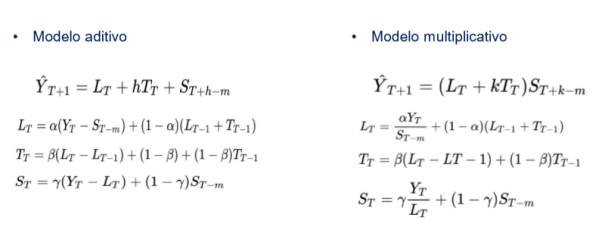

Particionando nuestra data en set de test y de train.

In [ ]:
tss_shw=TimeSeriesSplit(n_splits=14) #dividir la serie de tiempo en 14 conjuntos de entrenamiento y prueba

In [ ]:
x_shw=df.drop(labels=['ventas_totales'], axis= 1) #variables predictoras
y_shw=df['ventas_totales'] #variable objetivo

In [ ]:
#dividir los datos en conjuntos de entrenamiento y prueba en cada iteración
for train_index_shw,test_index_shw in tss_shw.split(x_shw):
    X_train_1, X_test_1 = x_shw.iloc[train_index_shw,:], x_shw.iloc[test_index_shw,:]
    y_train_1, y_test_1 = y_shw.iloc[train_index_shw], y_shw.iloc[test_index_shw]

In [ ]:
X_train_1.shape, y_train_1.shape #filas y columnas
#,seasonal='add'#,trend='add'

((56, 0), (56,))

In [ ]:
X_test_1.shape, y_test_1.shape

((4, 0), (4,))

#### MODELO HOLT WINTERS ####

In [ ]:
# la función 'ExponentialSmoothing' nos ayuda a implementar y ajustar el modelo
model_shw = ExponentialSmoothing(y_train_1, seasonal_periods=12, seasonal='add', trend='add') 
#y_train_1:datos-de-entrenamiento   #seasonal_p:estacionalidad-anual   #add:modelo aditivo
result_shw = model_shw.fit()
forecast_shw = result_shw.forecast(4).rename('Holt-Winters') #predicción de los próximo 4 periodo

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
print(result_shw.summary()) #resumen del modelo ajustado (Holt-Winters) con enfoque aditivo

                       ExponentialSmoothing Model Results                       
Dep. Variable:           ventas_totales   No. Observations:                   56
Model:             ExponentialSmoothing   SSE                    30176991089.359
Optimized:                         True   AIC                           1157.880
Trend:                         Additive   BIC                           1190.285
Seasonal:                      Additive   AICC                          1176.366
Seasonal Periods:                    12   Date:                 Tue, 28 Feb 2023
Box-Cox:                          False   Time:                         20:55:18
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7828571                alpha                 True
smoothing_trend          

In [ ]:
y_test_plot = y_test_1 #asignación de la data test
y_test_plot.index = forecast_shw.index #Plot con el mismo indice que la serie pronosticada

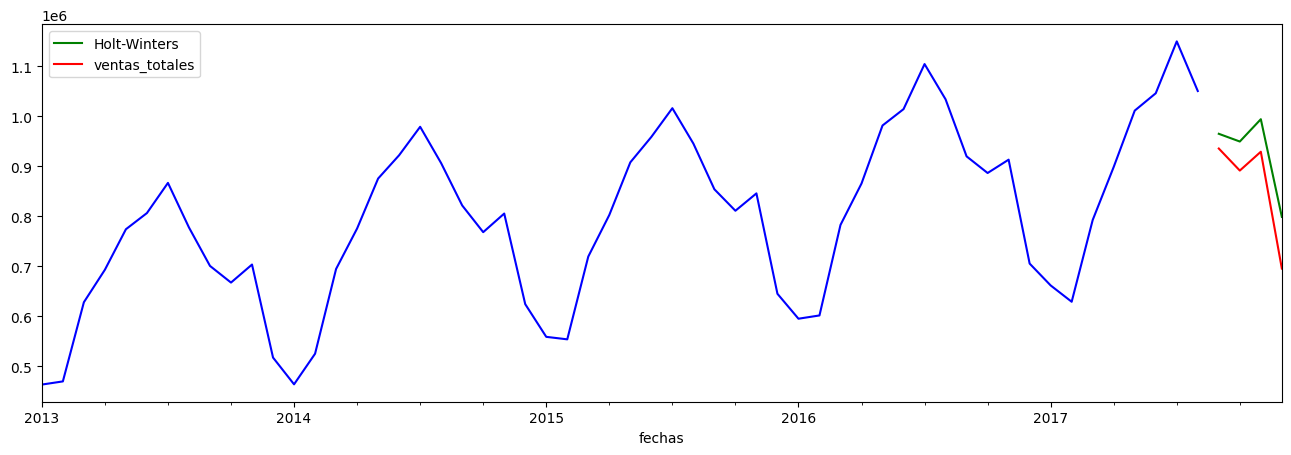

In [ ]:
# Graficar los valores reales, predicciones y valores ajustados juntos
plt.figure(figsize=(16,5),dpi=100)
forecast_shw.plot(color='green',legend=True) #valores predichos
result_shw.fittedvalues.plot(color='blue') #valores ajustados
y_test_plot.plot(color='red',legend=True) #valores reales
plt.show()

Bondad de Ajuste del Modelo

* RSME: Error cuadrático medio, **mide la cantidad de error que hay entre dos conjuntos de datos**. En otras palabras, compara un valor predicho y un valor observado o conocido.

* El uso del **puntaje AIC o BIC **como criterio de selección de modelo **no garantiza que el modelo** seleccionado (ya sea por puntaje AIC o BIC) **no viole los supuestos** del modelo.

* Por lo tanto, el siguiente paso es **aplicar un análisis residual** para verificar que los residuos tengan las siguientes características:
  * La media y la varianza son constantes.
  * Ruido blanco o no correlacionado.
  * Normalmente distribuido


In [ ]:
#Calcular el error cuadrático medio 
#Cuanto menor sea el valor del MSE, mejor será la calidad del modelo.
print("El error cuadrático medio (MSE) es: ", mean_squared_error(y_test_plot,forecast_shw))

El error cuadrático medio (MSE) es:  4788726083.872661


In [ ]:
#análisis de residuos
residuals=result_shw.resid

<AxesSubplot:xlabel='fechas'>

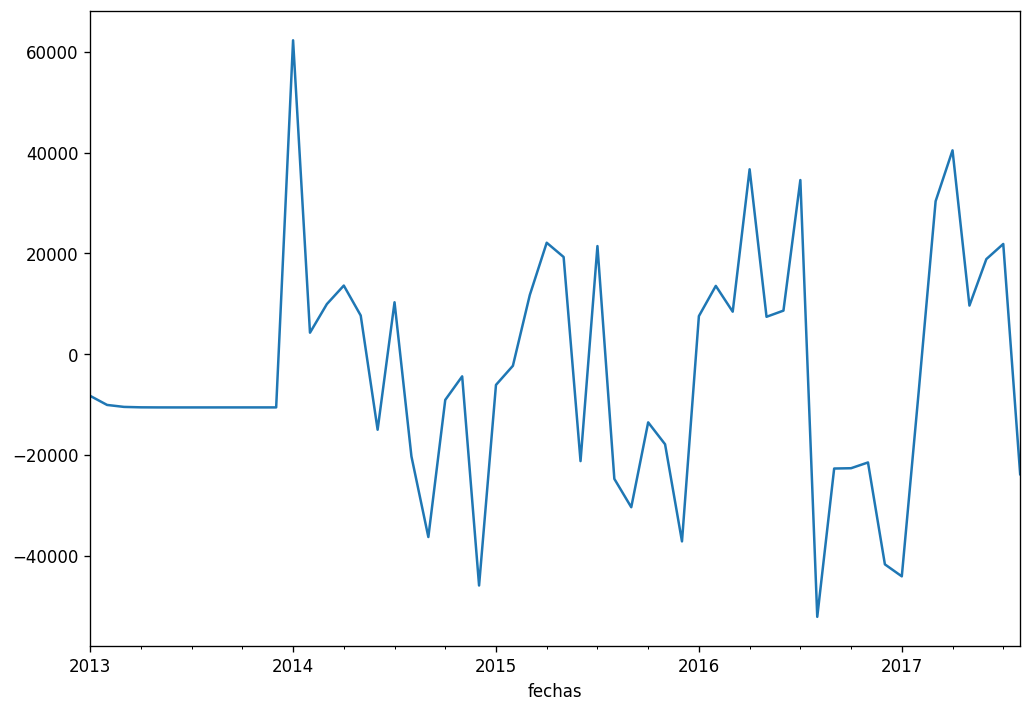

In [ ]:
residuals.plot()

In [ ]:
stats.kstest(residuals,'norm')

KstestResult(statistic=0.6071428571428571, pvalue=2.5144143657876654e-20)

* Comentario: Según la prueba de Kolmogorov-Smirnov aceptamos la hipótesis nula, con lo cual podemos afirmar que hay evidencia estadística para decir que nuestros residuos siguen una distribución normal. 

### ENFOQUE BOX-JENKINS #####

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

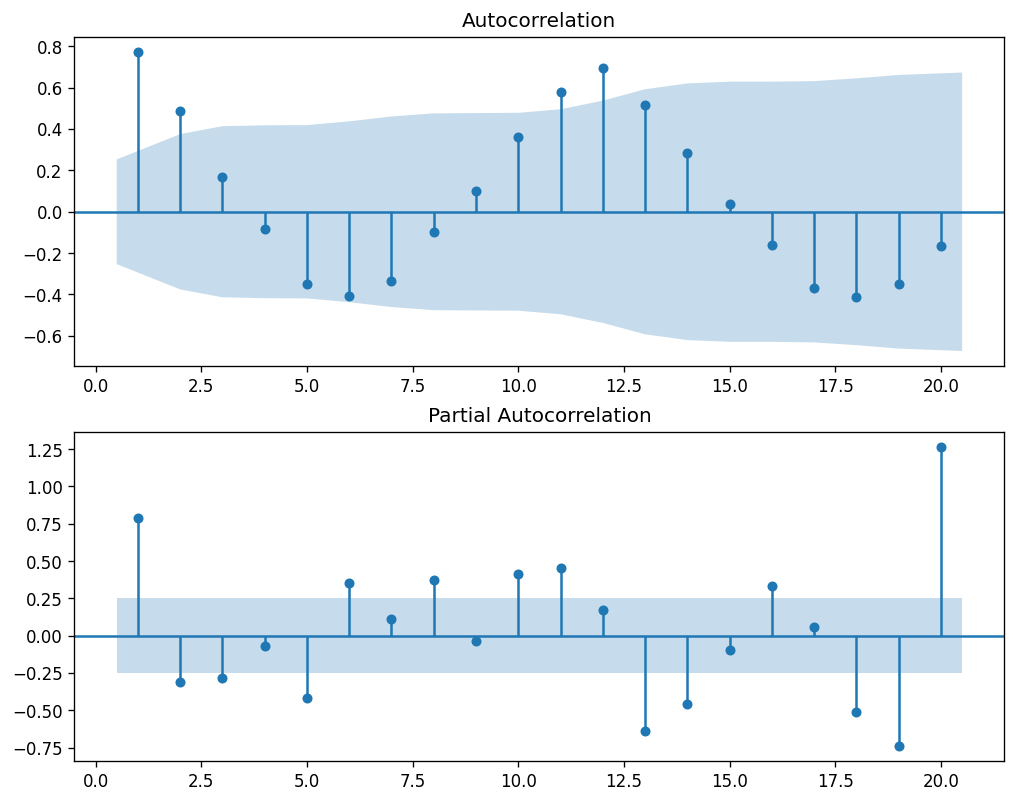

In [ ]:
#Autocorrelación y Correlación Parcial
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,8))
plot_acf(df.ventas_totales,lags=20,zero=False,ax=ax1)
plot_pacf(df.ventas_totales,lags=20,zero=False,ax=ax2) 
plt.show()

In [ ]:
#Particionamos nuestra información entre Test y Train
tss_2= TimeSeriesSplit()

In [ ]:
X_2=df.drop(labels=['ventas_totales'], axis= 1) #Quitar la columna
y_2=df['ventas_totales']

In [ ]:
for train_index_2,test_index_2 in tss_2.split(X_2):
    X_train_2, X_test_2 = X_2.iloc[train_index_2,:], X_2.iloc[test_index_2,:]
    y_train_2, y_test_2 = y_2.iloc[train_index_2], y_2.iloc[test_index_2]

In [ ]:
X_train_2.shape,y_train_2.shape

((50, 0), (50,))

In [ ]:
X_test_2.shape,y_test_2.shape

((10, 0), (10,))

#### MODELO ARIMA ####

In [ ]:
model_arima=SARIMAX(y_train_2, order=(2,3,1),enforce_stationary=False,
                   enforce_invertibility=False)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
results_arima = model_arima.fit()
print(results_arima.summary())

                               SARIMAX Results                                
Dep. Variable:         ventas_totales   No. Observations:                   50
Model:               SARIMAX(2, 3, 1)   Log Likelihood                -615.215
Date:                Tue, 28 Feb 2023   AIC                           1238.430
Time:                        21:26:43   BIC                           1245.831
Sample:                    01-01-2013   HQIC                          1241.215
                         - 02-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5120      0.168     -3.040      0.002      -0.842      -0.182
ar.L2         -0.0716      0.114     -0.627      0.531      -0.295       0.152
ma.L1         -1.0048      0.234     -4.295      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
forecast_arima=results_arima.get_prediction(start=-10).predicted_mean.rename('forecast arima')
forecast_arima.index=y_test_2.index
forecast_arima.head(100)

fechas
2017-03-01    1.038802e+06
2017-04-01    1.095641e+06
2017-05-01    1.086692e+06
2017-06-01    1.219028e+06
2017-07-01    9.553760e+05
2017-08-01    7.903376e+05
2017-09-01    7.962525e+05
2017-10-01    8.837477e+05
2017-11-01    5.567639e+05
2017-12-01    4.923861e+05
Name: forecast arima, dtype: float64

<AxesSubplot:xlabel='fechas'>

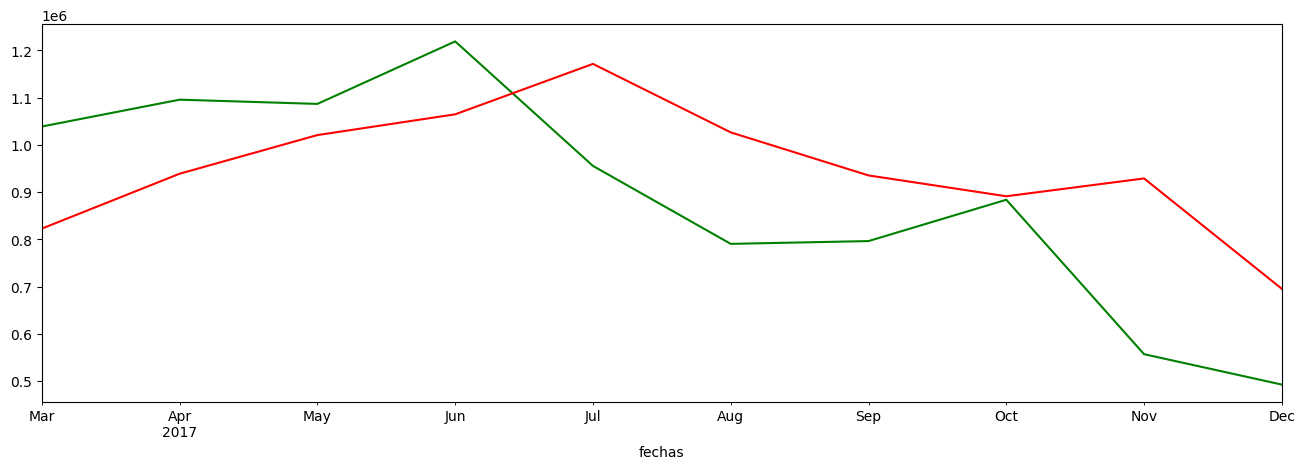

In [ ]:
#Graficamos
plt.figure(figsize=(16,5),dpi=100)
forecast_arima.plot(color='green')
y_test_2.plot(color='red')

#### MODELO SARIMA ####

In [ ]:
model_sarima=sm.tsa.statespace.SARIMAX(y_train_2, order=(2,3,1),seasonal_order=(1,2,0,12),
                    enforce_stationary=False,
                   enforce_invertibility=False)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
results_sarima=model_sarima.fit()
print(results_sarima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                      ventas_totales   No. Observations:                   50
Model:             SARIMAX(2, 3, 1)x(1, 2, [], 12)   Log Likelihood                -268.381
Date:                             Tue, 28 Feb 2023   AIC                            546.763
Time:                                     21:26:59   BIC                            552.440
Sample:                                 01-01-2013   HQIC                           548.190
                                      - 02-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6067      0.686     -0.885      0.376      -1.951       0.737
ar.L2         -0.0035      

In [ ]:
forecast_sarima=results_sarima.get_prediction(start=-10).predicted_mean.rename('forecast sarima')
forecast_sarima.index=y_test_2.index
forecast_sarima.head(100)

fechas
2017-03-01    1.013265e+06
2017-04-01    9.809896e+05
2017-05-01    1.142553e+06
2017-06-01    1.031976e+06
2017-07-01    8.799983e+05
2017-08-01    8.548975e+05
2017-09-01    8.797621e+05
2017-10-01    6.823606e+05
2017-11-01    6.898738e+05
2017-12-01    6.040510e+05
Name: forecast sarima, dtype: float64

<AxesSubplot:xlabel='fechas'>

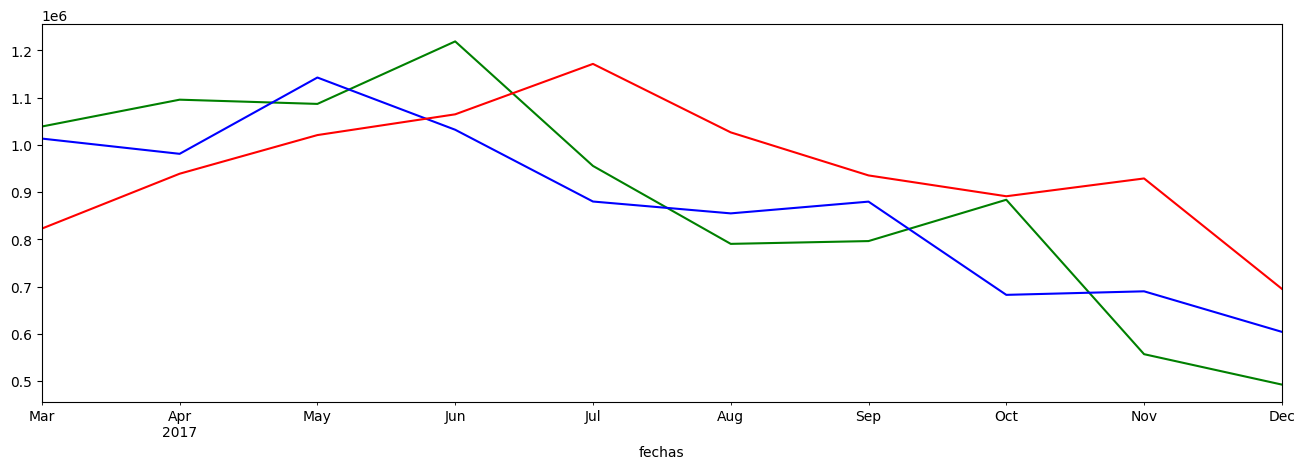

In [ ]:
plt.figure(figsize=(16,5),dpi=100)
forecast_arima.plot(color='green')
forecast_sarima.plot(color='blue')
y_test_2.plot(color='red')

* Vemos que tanto nuestros modelos sarima y arima ajustan bien a la curva, para tal efecto consideraremos nuestros 3 modelos para sacar un pronóstico promedio.

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


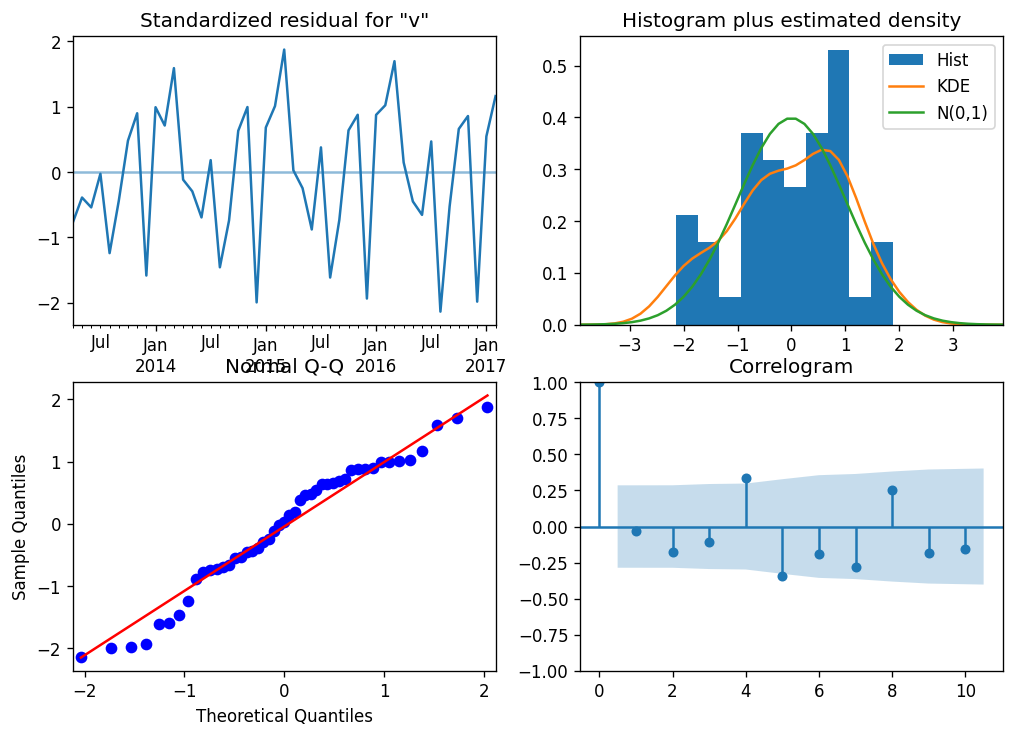

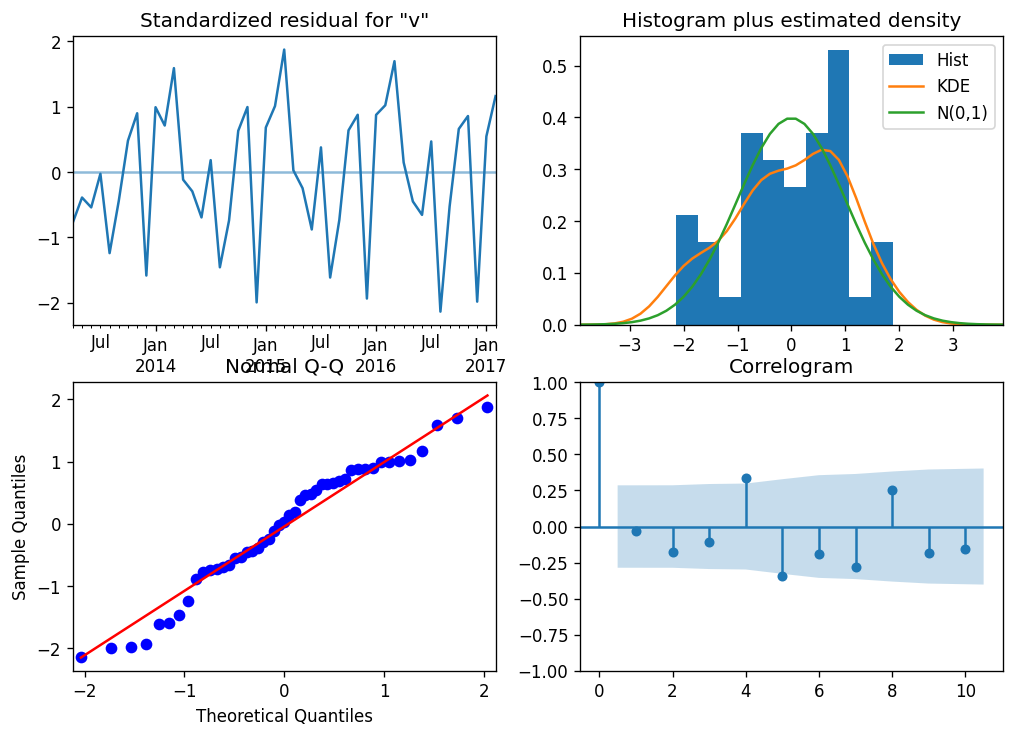

In [ ]:
results_arima.plot_diagnostics()

# PREDICCIÓN

#### Creamos los datos a predecir y los pronósticos ####

In [ ]:
s3=pd.Series([0],index=['2018-01-01'])
new=y_test_2.append(s3)

#### Predicción del Modelo Arima

In [ ]:
model_arima=SARIMAX(y_train_2, order=(2,3,1),enforce_stationary=False,
                   enforce_invertibility=False)
results_arima = model_arima.fit()
forecast_arima=results_arima.get_prediction(start=-11).predicted_mean.rename('forecast arima')
forecast_arima.index=new.index
print('El pronóstico según ARIMA: ', forecast_arima[10])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


El pronóstico según ARIMA:  492386.09788864804


#### Predicción del Modelo Sarima

In [ ]:
model_sarima=SARIMAX(y_train_2, order=(2,3,1),seasonal_order=(1,2,0,12),
                    enforce_stationary=False,
                   enforce_invertibility=False)
results_sarima=model_sarima.fit()
forecast_sarima=results_sarima.get_prediction(start=-11).predicted_mean.rename('forecast sarima')
forecast_sarima.index=new.index
print('El pronóstico es según SARIMA: ', forecast_sarima[10])


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


El pronóstico es según SARIMA:  604051.0303722572


#### Predicción del Modelo Holt-Winters

In [ ]:
model_shw=ExponentialSmoothing(y_train_1, seasonal_periods=12, seasonal='add', trend='add')
result_shw=model_shw.fit()
forecast_shw= result_shw.forecast(5).rename('Holt-Winters')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
print('El pronóstico según ARIMA: ', forecast_arima[10])

El pronóstico según ARIMA:  492386.09788864804


In [ ]:
print('El pronóstico es según SARIMA:',forecast_sarima[10])

El pronóstico es según SARIMA: 604051.0303722572


In [ ]:
print('El pronóstico es según HOLT-WINTERS:',forecast_shw[4])

786974.366458741

In [ ]:
a=(forecast_shw[4]+forecast_sarima[10])/2
a

695512.6984154992

# CONCLUSIONES

* Vemos que **2 de nuestros 3 modelos pronostican un incremento** respecto al mes pasado.
* Para el siguiente mes **('Enero')** oscila nuestra predicción entre los **604051.1** y los **786974.36** con una **media de 695512.69**, considerando que nuestro modelo haya ajustado bien la información.